In [89]:
import pandas as pd
pd.set_option('display.precision', 2)

df = pd.read_csv('https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000')
df

,New York,New York,Average Temperature,January
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,189501,29.6,-2.0,NaN
...,...,...,...,...
128,201901,32.6,1.0,NaN
129,202001,39.2,7.6,NaN
130,202101,34.8,3.2,NaN
131,202201,30.4,-1.2,NaN


# 1)

In [90]:
df = df.drop(columns=' January', axis=1)
df = df.drop(df.index[:4])
df.index = range(len(df))
df

,New York,New York,Average Temperature
0,189501,29.6,-2.0
1,189601,28.8,-2.8
2,189701,29.6,-2.0
3,189801,34.2,2.6
4,189901,30.1,-1.5
...,...,...,...
124,201901,32.6,1.0
125,202001,39.2,7.6
126,202101,34.8,3.2
127,202201,30.4,-1.2


In [91]:
df.isnull().any()

New York                False
 New York               False
 Average Temperature    False
dtype: bool

In [92]:
df.columns = ['Year', 'Temperature', 'Anomaly']
df

,Year,Temperature,Anomaly
0,189501,29.6,-2.0
1,189601,28.8,-2.8
2,189701,29.6,-2.0
3,189801,34.2,2.6
4,189901,30.1,-1.5
...,...,...,...
124,201901,32.6,1.0
125,202001,39.2,7.6
126,202101,34.8,3.2
127,202201,30.4,-1.2


In [93]:
df.dtypes

Year           object
Temperature    object
Anomaly        object
dtype: object

In [94]:
df['Year'] = df['Year'].str[:4].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Anomaly'] = df['Anomaly'].astype(float)
df

,Year,Temperature,Anomaly
0,1895,29.6,-2.0
1,1896,28.8,-2.8
2,1897,29.6,-2.0
3,1898,34.2,2.6
4,1899,30.1,-1.5
...,...,...,...
124,2019,32.6,1.0
125,2020,39.2,7.6
126,2021,34.8,3.2
127,2022,30.4,-1.2


In [95]:
df.dtypes

Year             int32
Temperature    float64
Anomaly        float64
dtype: object

In [96]:
df['Temperature'].describe()

count    129.00
mean      31.92
std        4.54
min       21.20
25%       29.00
50%       31.70
75%       34.80
max       43.50
Name: Temperature, dtype: float64

# 3)

In [97]:
from scipy import stats

linear_regression = stats.linregress(x=df['Year'], y=df['Temperature'])

print(f'Slope of lin reg: {linear_regression.slope}\n'
      f'Intercept of lin reg: {linear_regression.intercept}')

Slope of lin reg: 0.02154013864042934
Intercept of lin reg: -10.27310058884914


Predict temp

In [98]:
def predict_temp(year):
      return linear_regression.slope * year + linear_regression.intercept


for year in range(2019, 2023):
      temp = predict_temp(year)
      print(f"Predicted temperature for {year} year is {temp}")

Predicted temperature for 2019 year is 33.21643932617769
Predicted temperature for 2020 year is 33.237979464818125
Predicted temperature for 2021 year is 33.25951960345855
Predicted temperature for 2022 year is 33.28105974209898


# 4) Predict values to 1895

In [99]:
for year in range(1885, 1895):
      temp = predict_temp(year)
      print(f"Predicted temperature for {year} year is {temp}")

Predicted temperature for 1885 year is 30.33006074836016
Predicted temperature for 1886 year is 30.351600887000593
Predicted temperature for 1887 year is 30.37314102564102
Predicted temperature for 1888 year is 30.39468116428145
Predicted temperature for 1889 year is 30.416221302921883
Predicted temperature for 1890 year is 30.43776144156231
Predicted temperature for 1891 year is 30.45930158020274
Predicted temperature for 1892 year is 30.480841718843166
Predicted temperature for 1893 year is 30.5023818574836
Predicted temperature for 1894 year is 30.523921996124024


# 2)+5)  Reg plot and line of linear regg

In [100]:
print(f'Equation  for linear regression:\n temp = {linear_regression.slope} * year + {linear_regression.intercept}')

Equation  for linear regression:
 temp = 0.02154013864042934 * year + -10.27310058884914


<Axes: xlabel='Year', ylabel='Temperature'>

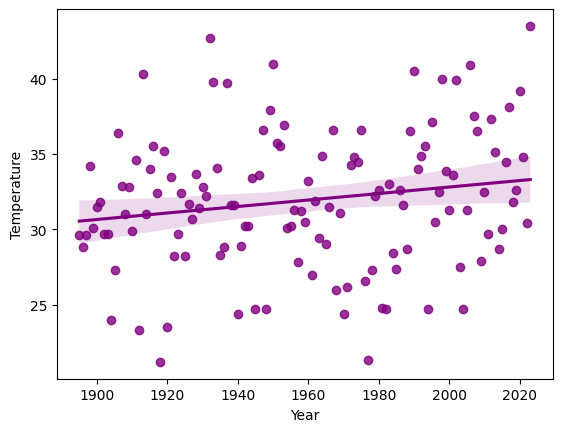

In [101]:
import seaborn as sns

sns.regplot(x=df['Year'], y=df['Temperature'], color='purple')

# 6) Scale from 0 to 100

(0.0, 100.0)

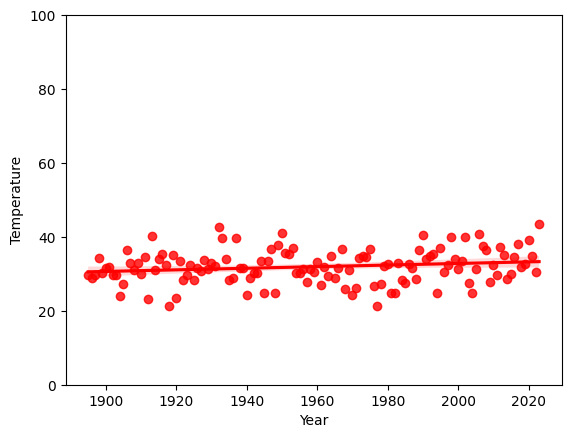

In [102]:
sns.regplot(x=df['Year'], y=df['Temperature'], color='red').set_ylim(0, 100)

# 7) Conclusion for 2019-2022

In [103]:
for year in range(2019, 2023):
      temp = predict_temp(year)
      actual_temp = df.loc[df['Year'] == year]['Temperature'].values[0]
      diff = abs(round(temp - actual_temp, 2))

      print(f"Predicted temperature for {year} year is {temp}."
            f"\nThe actual temp is {actual_temp}"
            f"\nDifference by absolute: {diff}\n")

Predicted temperature for 2019 year is 33.21643932617769.
The actual temp is 32.6
Difference by absolute: 0.62

Predicted temperature for 2020 year is 33.237979464818125.
The actual temp is 39.2
Difference by absolute: 5.96

Predicted temperature for 2021 year is 33.25951960345855.
The actual temp is 34.8
Difference by absolute: 1.54

Predicted temperature for 2022 year is 33.28105974209898.
The actual temp is 30.4
Difference by absolute: 2.88

